# Assignment 3

## Q1

### a - Investigate the behavior of the training and testing errors of the output when the number of hidden nodes is fixed (e.g., 3 hidden nodes). You can vary the number for the sample data from 20 samples to 200 samples.

In [84]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [85]:
def function(samples):
    x = np.random.uniform(-1,2,samples)
    y = x * np.sin(6*np.pi*x) * np.exp(-pow(x,2))
    return x,y

In [86]:
def function2(samples):
    x = np.random.uniform(-2,3,samples)
    y = np.exp(-pow(x,2)) * np.arctan(x) * np.sin(4*np.pi*x)
    return x,y

In [92]:
def execute(X,y,samples):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

    model = Sequential()
    model.add(Input(shape=(1,)))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mse')

    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
    train_error = history.history['loss']
    test_error = history.history['val_loss']

    epochs = range(1, len(train_error) + 1)
    plt.plot(epochs, train_error, 'b', label='Training Error')
    plt.plot(epochs, test_error, 'r', label='Testing Error')
    plt.title('Neural network with variable hidden samples - {}'.format(samples))
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

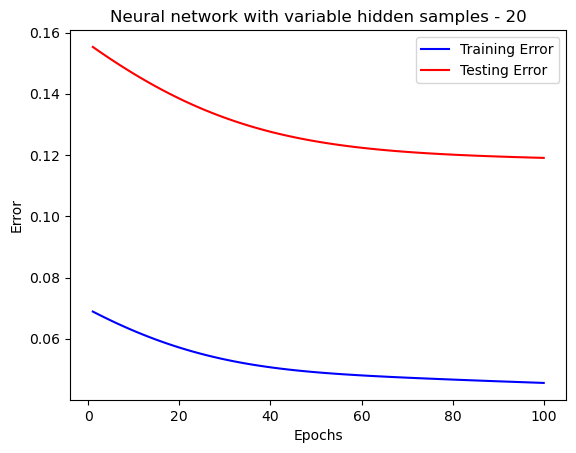

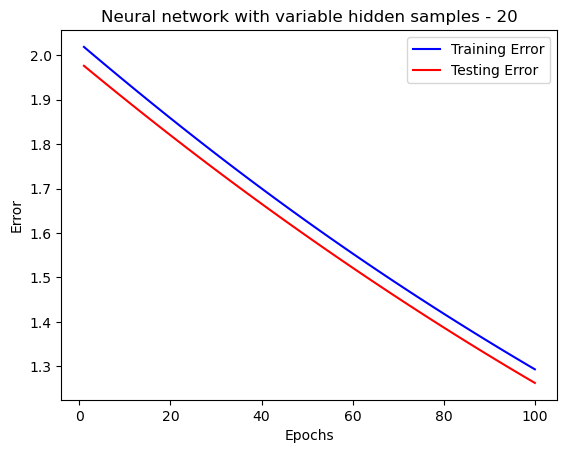

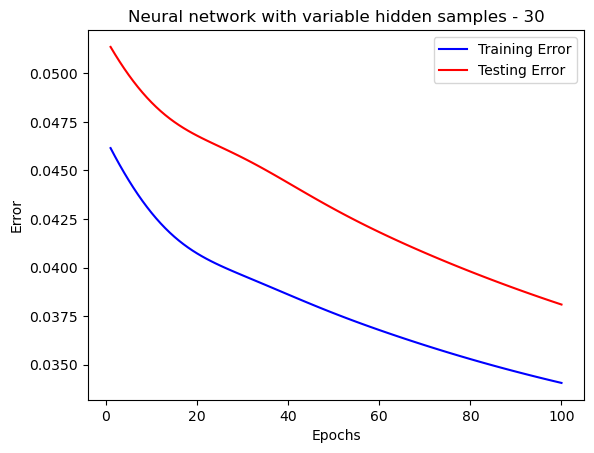

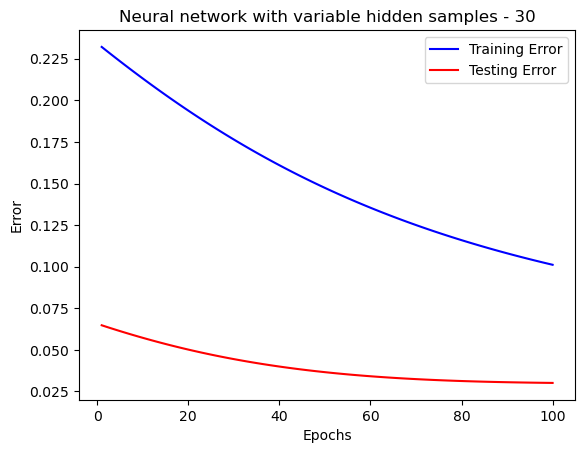

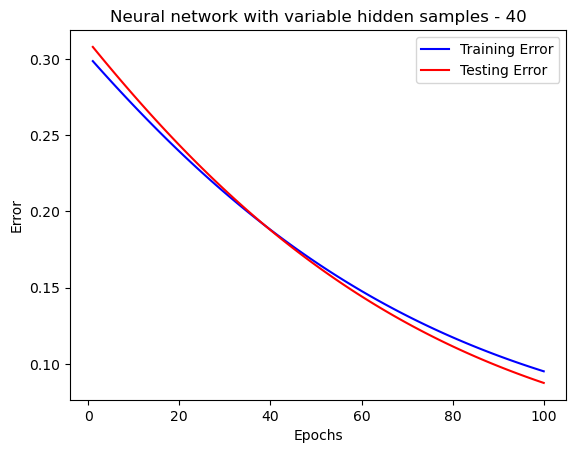

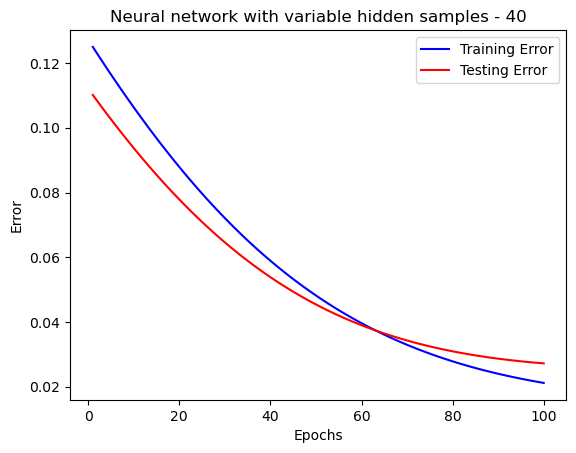

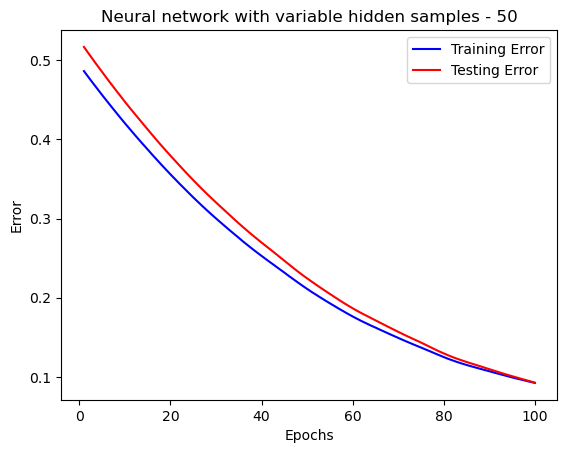

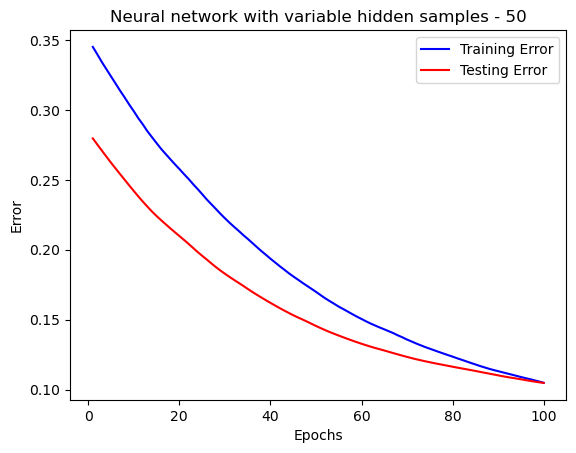

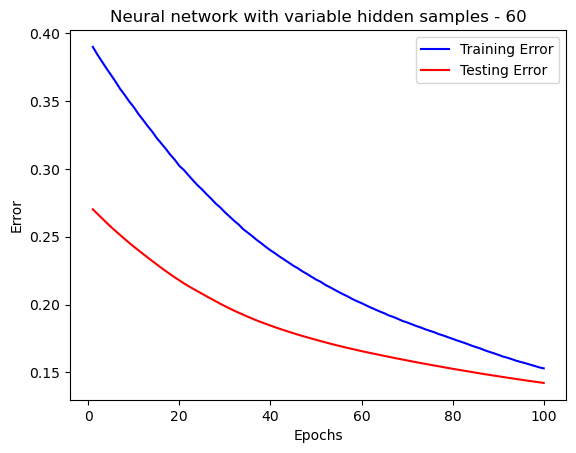

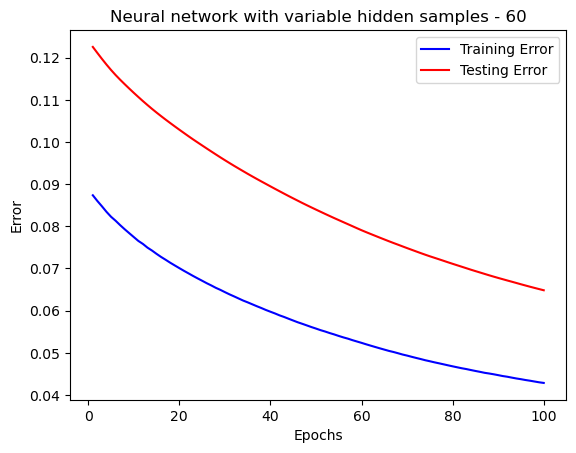

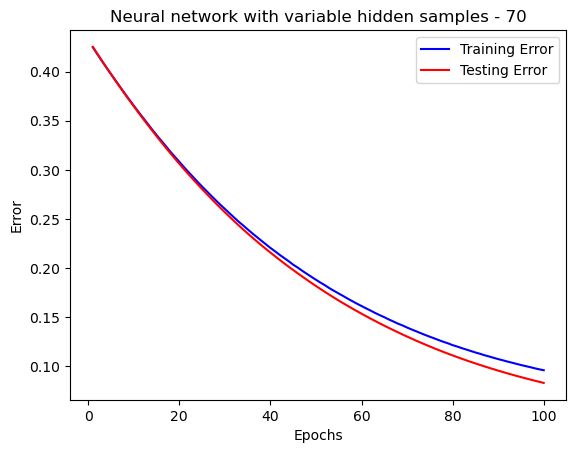

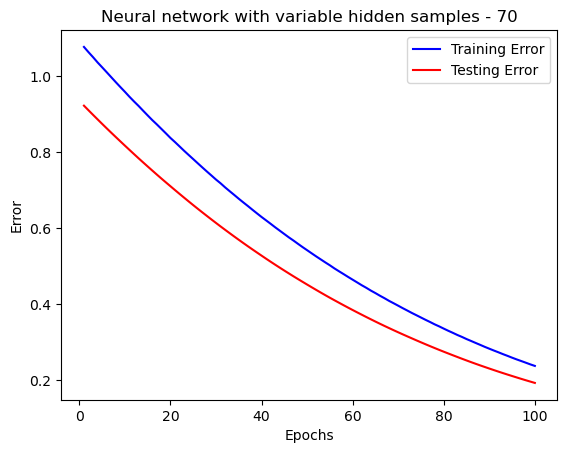

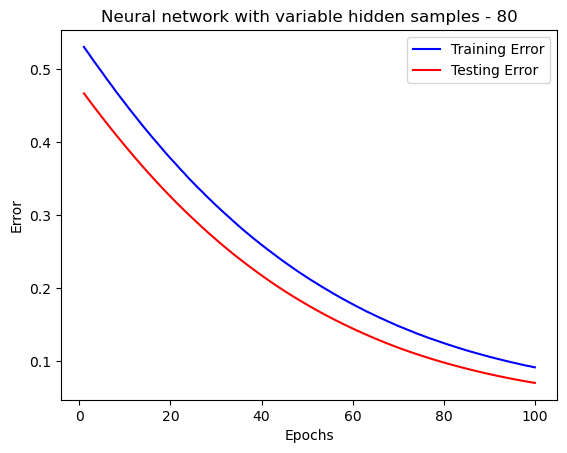

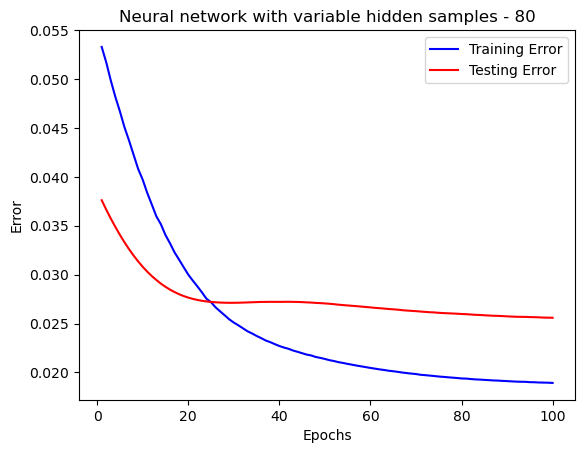

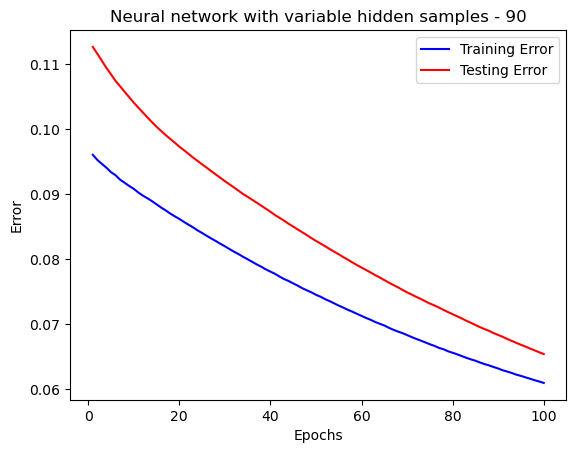

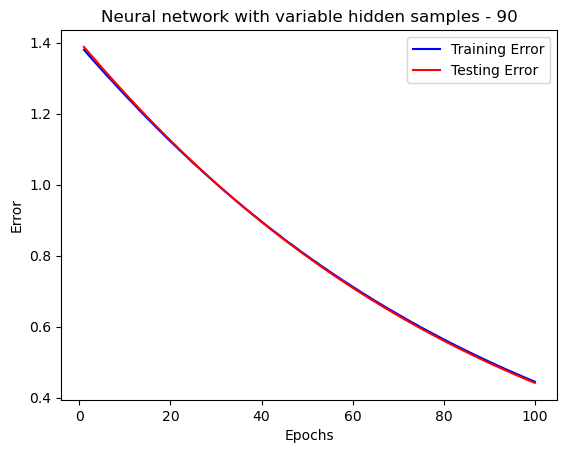

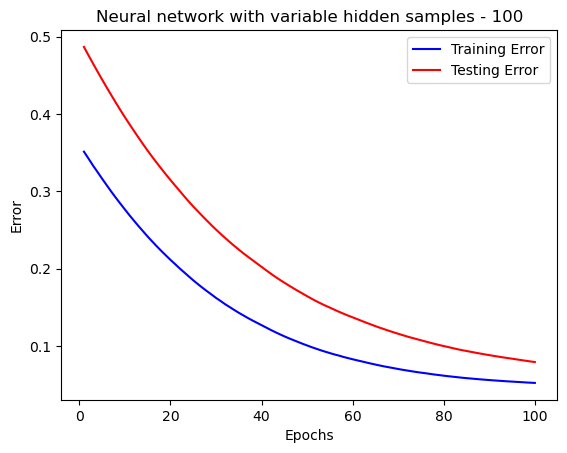

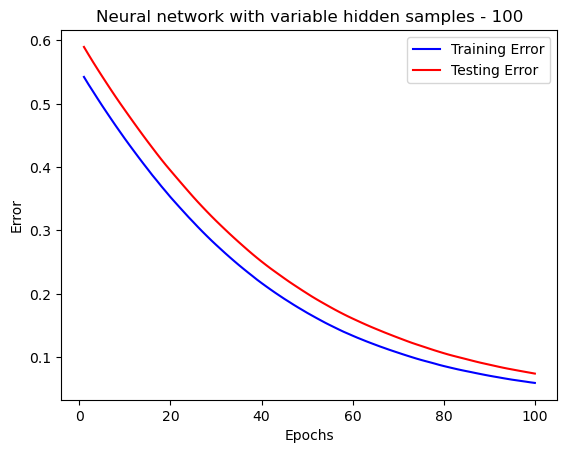

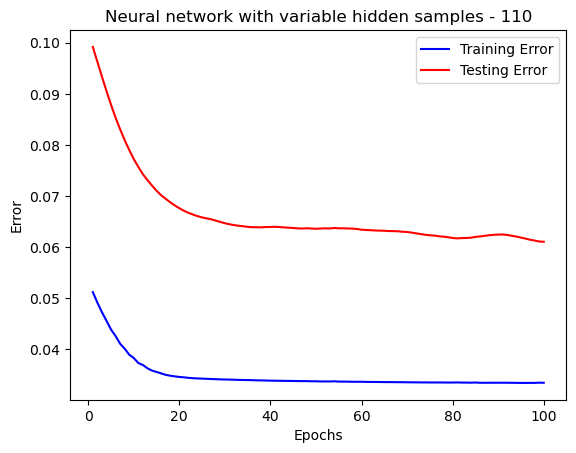

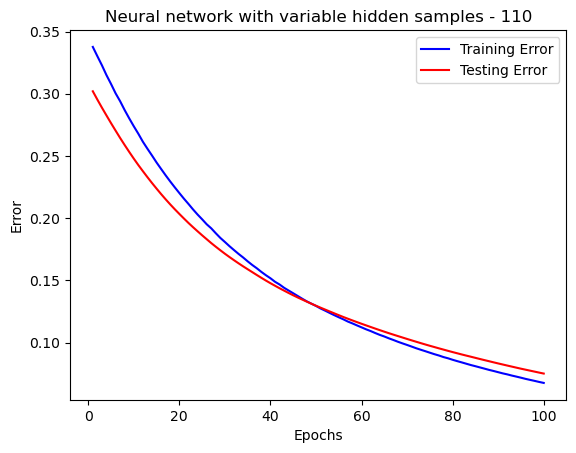

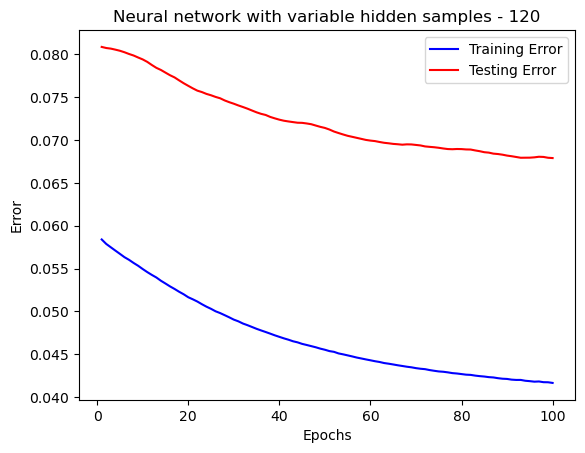

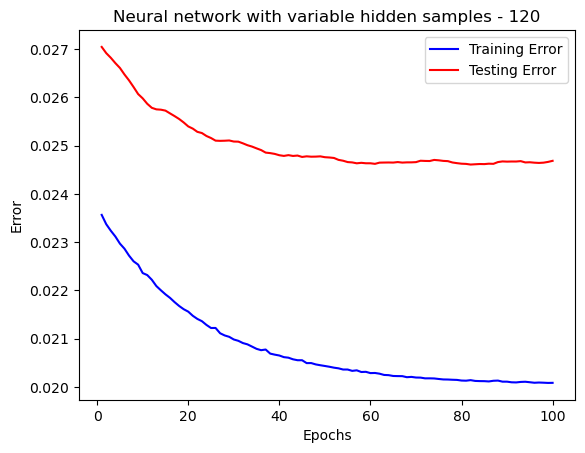

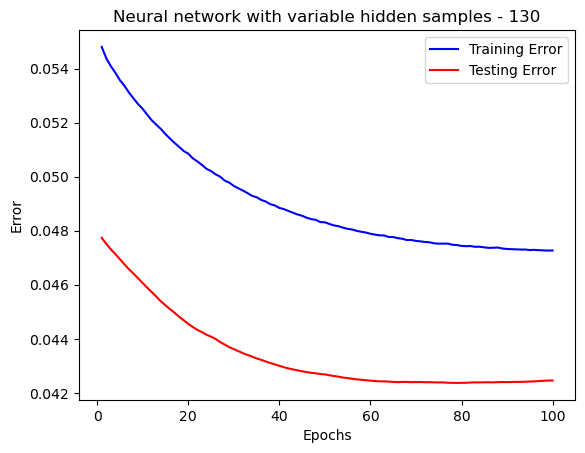

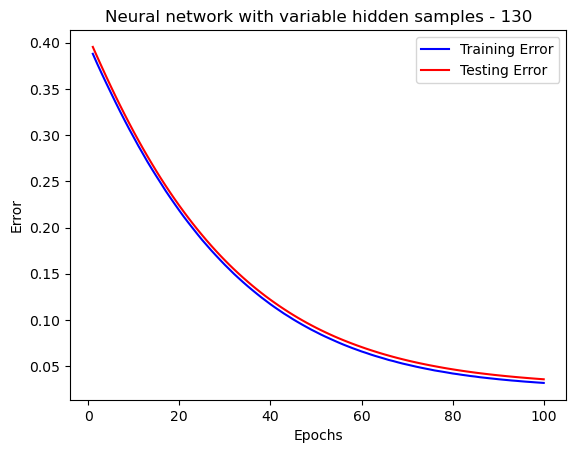

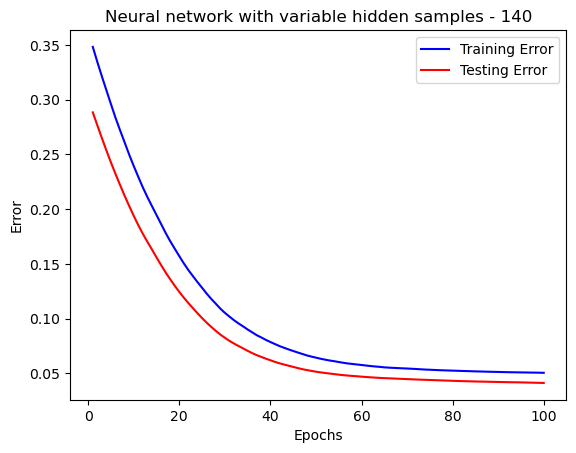

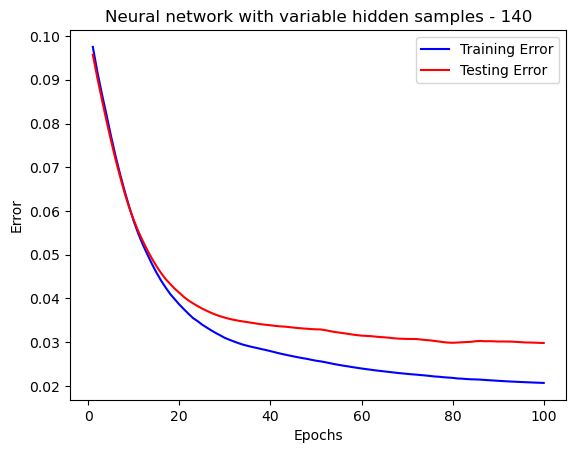

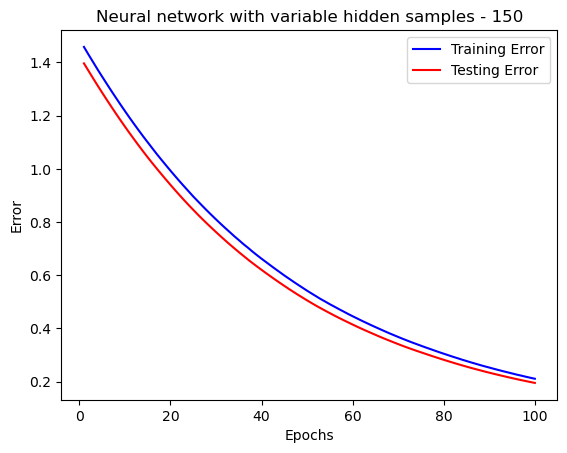

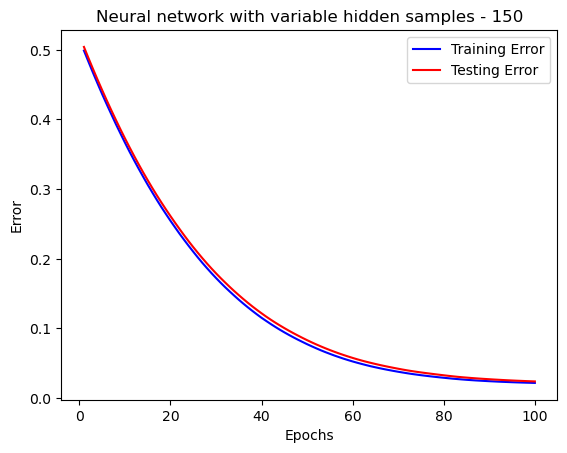

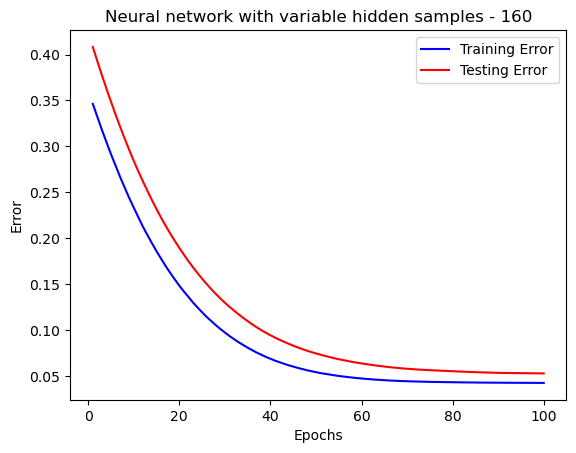

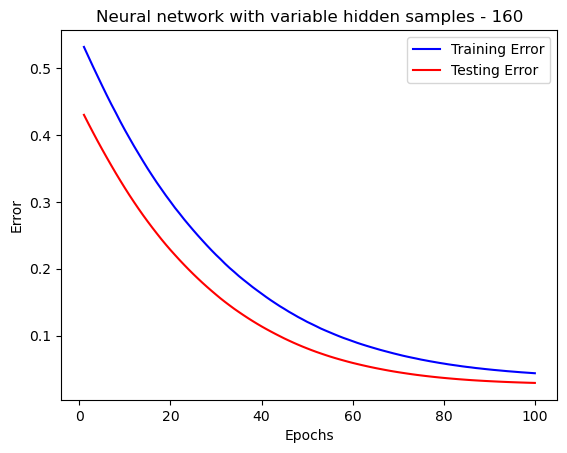

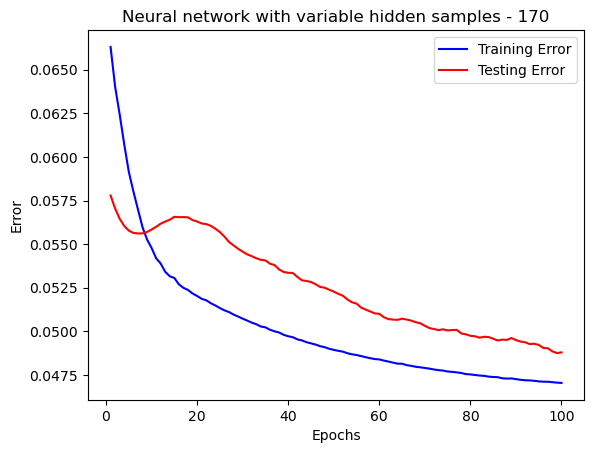

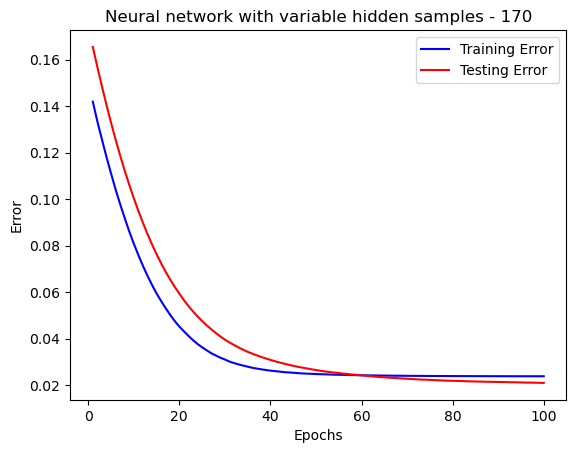

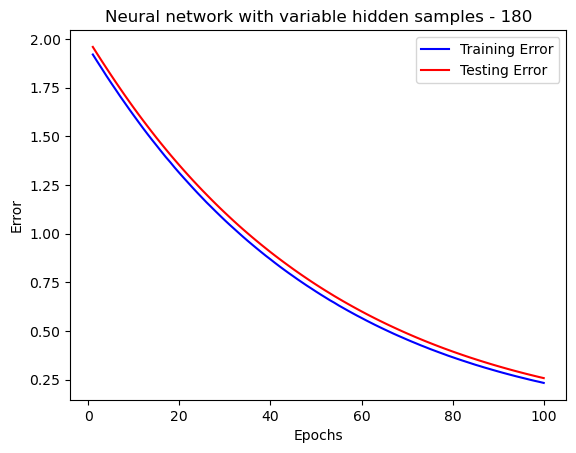

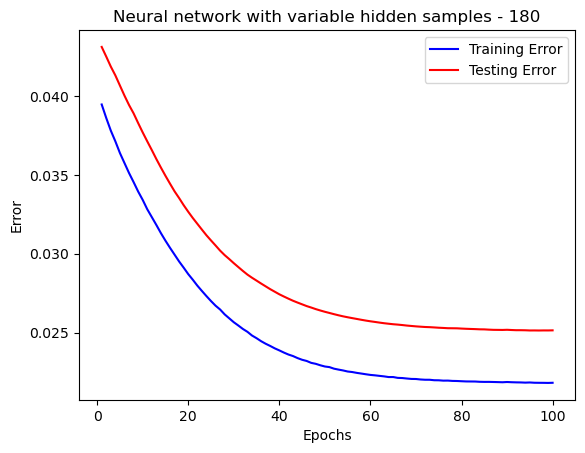

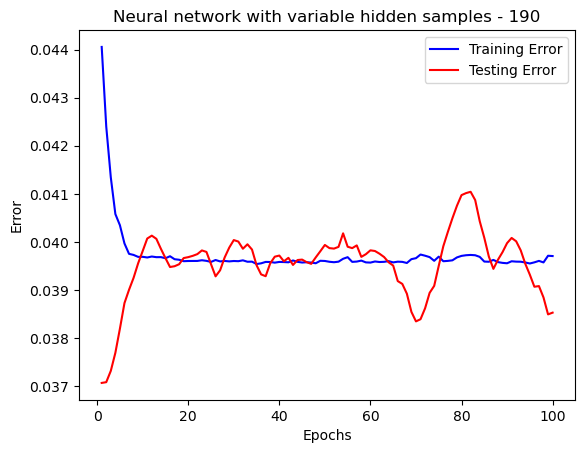

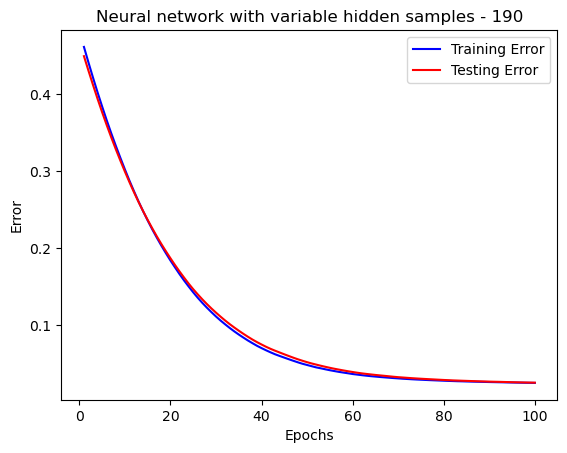

In [93]:
for i in range(20,200,10):
    X_1, y_1 = function(i)
    X_2, y_2 = function2(i)
    
    execute(X_1,y_1,i)
    execute(X_2,y_2,i)

### b - Investigate the effect of the number of hidden nodes on the training and testing error output for a given fixed number of training samples (e.g., 100 training samples). Try to find the optimal number of hidden nodes to lead to the smallest training and testing error.

In [96]:
def execute_new(X,y):
    for i in range(3,20,3):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

        model = Sequential()
        model.add(Input(shape=(1,)))
        model.add(Dense(i,activation='sigmoid'))
        model.add(Dense(1))
        model.compile(optimizer='adam',loss='mse')

        history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
        train_error = history.history['loss']
        test_error = history.history['val_loss']

        epochs = range(1, len(train_error) + 1)
        plt.plot(epochs, train_error, 'b', label='Training Error')
        plt.plot(epochs, test_error, 'r', label='Testing Error')
        plt.title('Neural network with variable hidden nodes - {}'.format(i))
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        plt.legend()
        plt.show()

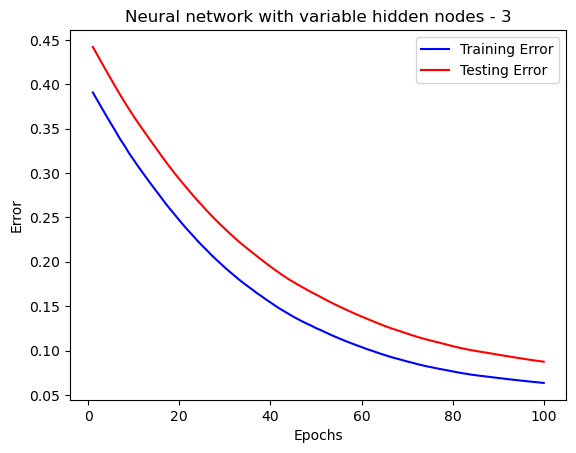

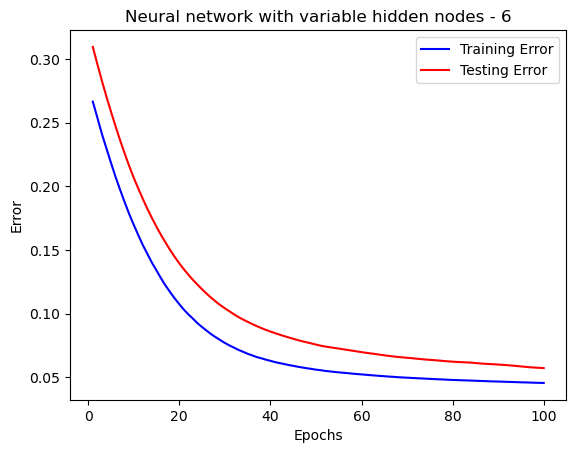

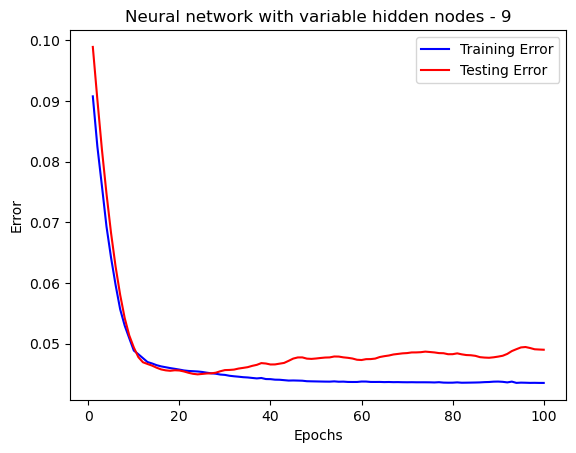

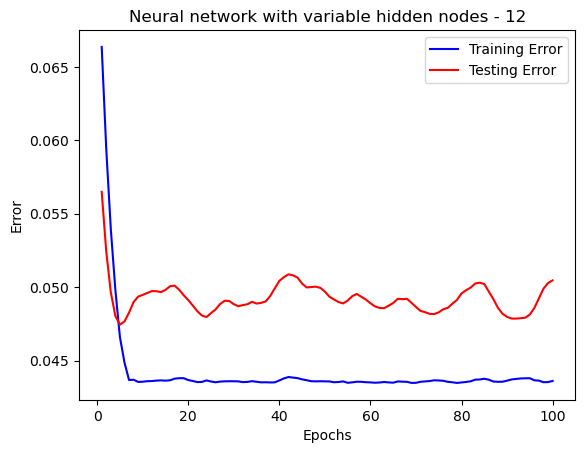

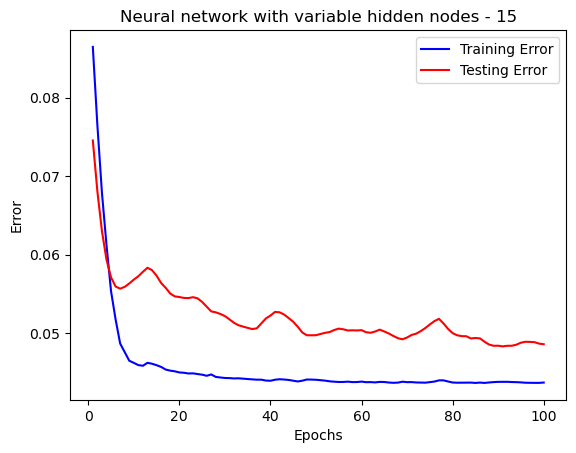

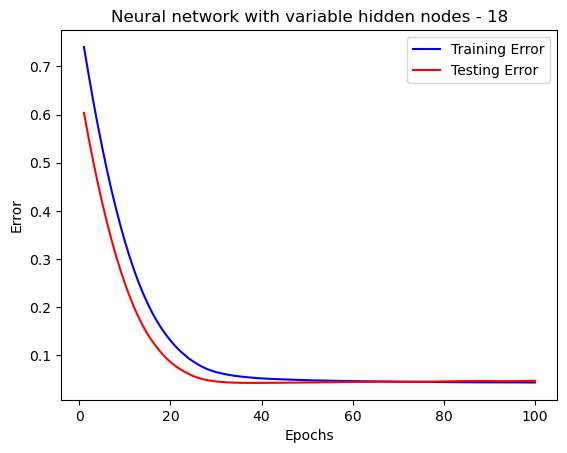

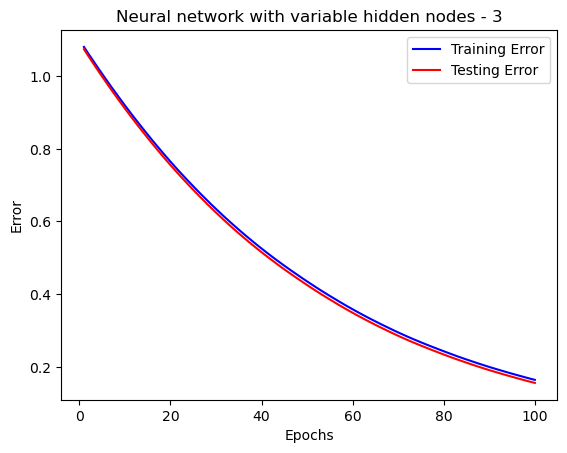

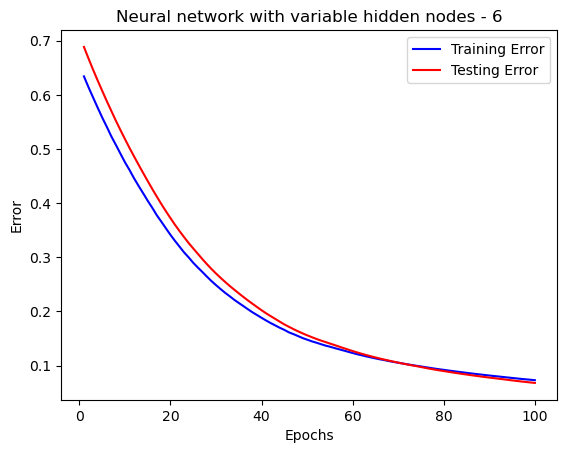

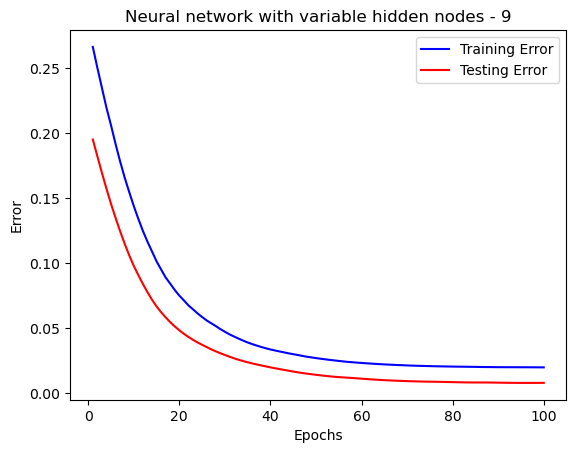

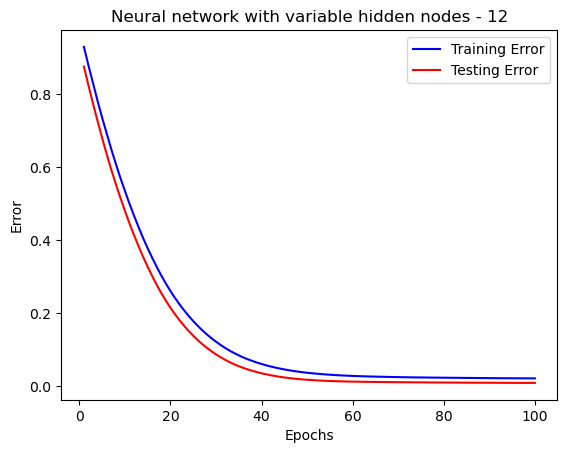

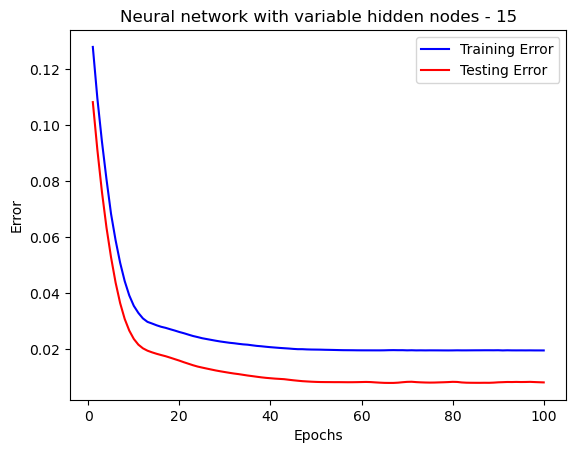

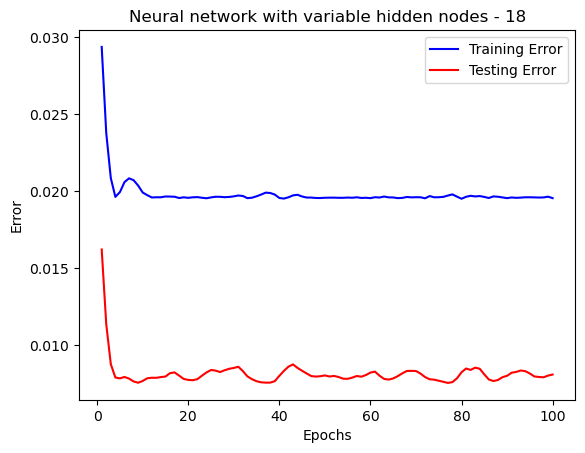

In [97]:
X_1, y_1 = function(100)
X_2, y_2 = function2(100)
    
execute_new(X_1,y_1)
execute_new(X_2,y_2)

### c - Make qualitative and quantitative deductions considering these simulations. Produce plots showing the training and testing errors for every simulation.

#### While training the network, on varying training samples, we observe that the training error reduces to a minimum value at around 130 training samples, after which the error by the end of the training increases. 

#### While training the network, by varying the number of hidden nodes, no change in training error is observed when it comes to function1. However, while for function2 the training error reduces with the increase in hidden neurons.

## Q2

### a - Set up two sets of data, one for network training and the other for testing (70% for training and 30% for testing). The total number of input-output data is 500 and is obtained by randomly varying the input variables (x1, x2) within the interval [-1,1] by [-4 4].

In [98]:
def function3(samples):
    x1 = np.random.uniform(-1,2,samples)
    x2 = np.random.uniform(-4,5,samples)
    y = np.sin(2*np.pi*x1) * np.cos(0.5*np.pi*x2) * np.exp(-pow(x1,2))
    return x1,x2,y

In [99]:
X = []
X1, X2, y = function3(500)

X.append(X1)
X.append(X2)

X = np.array(X).T
X.shape

(500, 2)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### b - First, fix the number of hidden neurons to 4 (double of the number of input nodes) and analyze the performance of the obtained network (training and testing output errors). Use one hidden layer for the exercise.

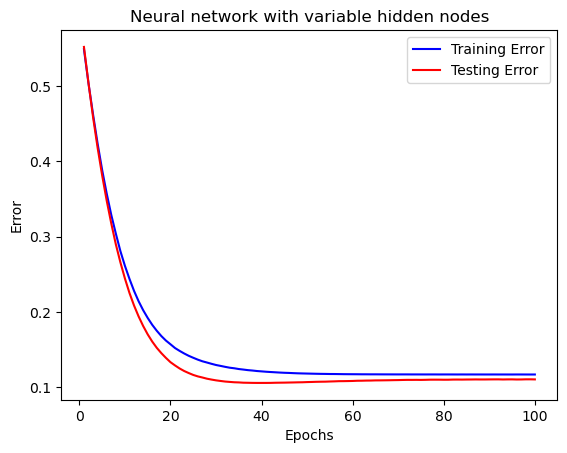

In [101]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
train_error = history.history['loss']
test_error = history.history['val_loss']

epochs = range(1, len(train_error) + 1)
plt.plot(epochs, train_error, 'b', label='Training Error')
plt.plot(epochs, test_error, 'r', label='Testing Error')
plt.title('Neural network with variable hidden nodes')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

### c - Analyze the performance of the network with more and then with fewer hidden nodes (2, 6, 8, 12, 20). Find the best number of hidden neurons leading to the least training and testing network error and discuss.

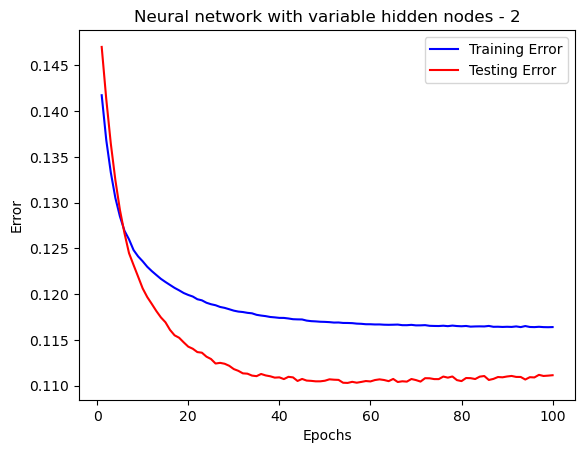

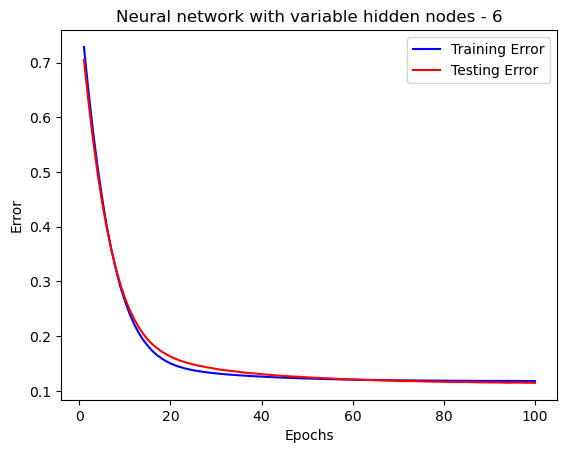

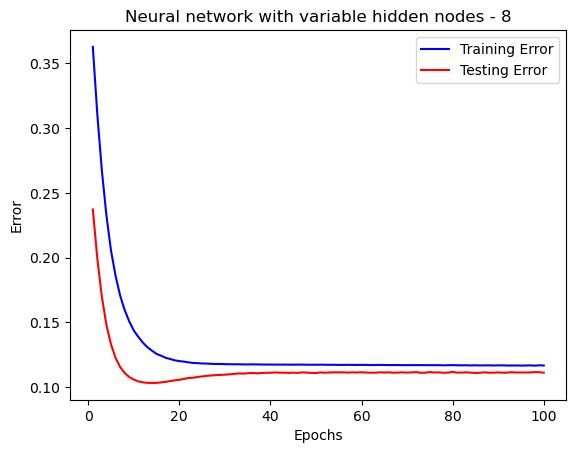

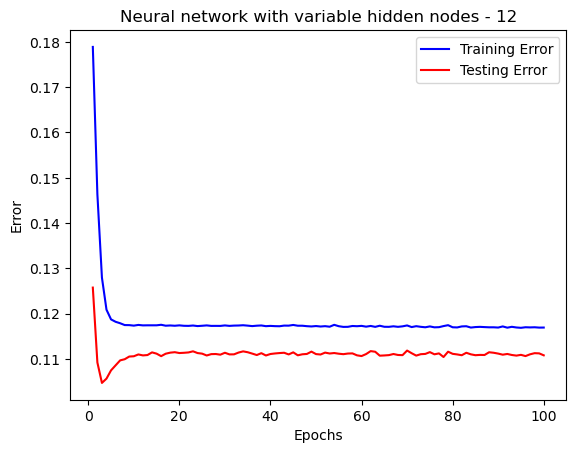

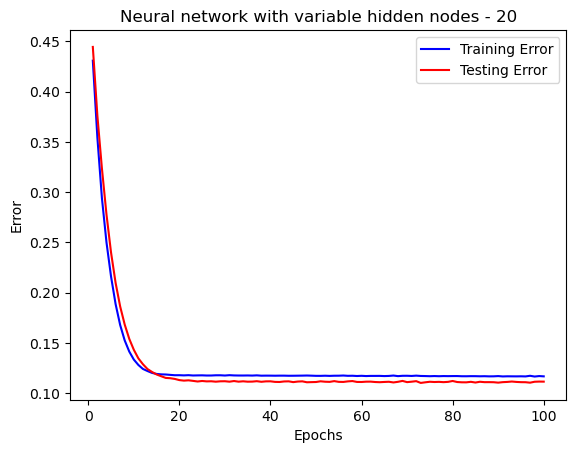

In [105]:
train_errors_epochs, test_errors_epochs,neurons = [],[],[]
for i in [2,6,8,12,20]:
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(i,activation='sigmoid'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mse')

    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
    train_error = history.history['loss']
    test_error = history.history['val_loss']
    
    neurons.append(i)
    train_errors_epochs.append(train_error)
    test_errors_epochs.append(test_error)

    epochs = range(1, len(train_error) + 1)
    plt.plot(epochs, train_error, 'b', label='Training Error')
    plt.plot(epochs, test_error, 'r', label='Testing Error')
    plt.title('Neural network with variable hidden nodes - {}'.format(i))
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

In [106]:
train_errors, test_errors = [],[]
for i in range(len(train_errors_epochs)):
    train_errors.append(np.mean(train_errors_epochs[i]))
    test_errors.append(np.mean(test_errors_epochs[i]))

In [107]:
print(neurons)
print(train_errors)
print(test_errors)

[2, 6, 8, 12, 20]
[0.11875504367053509, 0.16264974497258664, 0.12819333024322987, 0.11832946099340916, 0.12909124933183194]
[0.11352888531982899, 0.16438114359974862, 0.11338990315794945, 0.11105664074420929, 0.12631480149924756]


#### The best number of hidden neurons leading to the least training and testing network error are 12